<center><h1>DATA CAMP Team Project : Animal attention classification</h1></center>
<br/>
<center>Authors : Pierre ADEIKALAM - Guangyue CHEN - Jiabin CHEN - Chuanyuan QIAN - Qin WANG - Kevin XU</center>

<img src="suicidal-deer-2.png">

#### M2 Data Science - Université Paris Saclay  
 
**Professors :** Alexandre GRAMFORT (Inria) & Thomas MOREAU (Inria)

## Table of Contents
1. [Science Case](#BusinessCase)
2. [Installation of Librairies](#Imports)
3. [Data Exploration](#DataExploration)
4. [Baseline Model](#Baselinemodel)
5. [Submission on Ramp](#Submission-structure)

# <a style="color:#920037"> 1. SCIENCE CASE </a>
## <a style="color:#920037"> 1.1 Introduction </a>

> One of the greatest challenges of autonomous driving is to teach a system how to deal with uncommon and unexpected events. One kind of such event is the encounter of animals on the road. Due to our poor understanding of animal cognition, it is hard to teach an autonomous system how to deal with this kind of encounter. 
>
> In Sweden, the National Wildlife Accident Council has stated that 58,337 wildlife accidents had been reported to the police in 2016 alone. The large majority of these accidents involve large animals like roe deer (44,456), deer, wild boars and elks (5,846). These animals should have the cognitive abilities to properly assess the threat of incoming vehicles according to (Lima et al, 2015), but the main issue is that **vehicles are not detected before the impact**.
>
> In some settings, autonomous systems have the ability to avoid crashes with higher precision than humans (Yu and Petnga, 2018), but risky evasive maneuvers need to be deployed as a last resort. In the case of avoiding animal collisions, (Lima et al, 2015) established the following behavior diagram:
>
><img src="behavior.jpg" width = "400px">
>
> This diagram illustrates the key animal behavioural steps in avoiding a collision with an object on a collision course. If the object is unable to adapt its trajectory, failure from the animal to properly react at any step from detection through evasion will result in a collision. As we cannot expect a fully autonomous car to come to a full stop each time an animal is encountered in the side of the road, **it should be able to evaluate the reaction of the animal at each of these steps** in order to engage in an evasive maneuver if it is needed.
>
> Therefore, **the first step in order to avoid a collision should be to evaluate if the vehicle has been detected**. As new regulations enforce cars to be as silent as possible and silent electric cars begin to take over, animals have to rely on their **vision** to detect oncoming vehicles. From the perspective of the autonomous system, one effective way to evaluate this is to detect thanks to its cameras if **at some point the animal looked at the car**, which is a typical classification problem. In this challenge, we will try to provide a solution that answers this question.
>
## <a style="color:#920037"> 1.2 Task and Dataset </a>

> This challenge is an image classification problem that should evalute whether or not an animal is looking at the camera. For this, we have created a new dataset from Google Images and labeled each one of them ourselves.
>
> The training dataset is made of 2945 images of animals that are commonly encountered near roads around the world such as dogs and cats in urban roads, horses, cows, pigs and sheep in rural roads but also more exotic animals such as monkeys, koalas, kanguroos, turtles, llamas found near roads in Australia, Asia and South America.
>
> The test dataset is made of 280 images and is a lot more diverse, with completely different species. The reason we chose to do this is we would like to know how well this dataset can be generalized to other animals that are not as common near roads but could also be encountered.
>
> The labels are:
> 
> * 0 : The animal or the majority of the animals is looking away from the camera.
> * 1: The animal or the majority of the animals is looking at the camera



# <a style="color:#920037"> 2. INSTALLATION OF LIBRAIRIES </a>

To get this starting kit running, the following dependencies are required : 

- numpy
- ipywidgets
- matplotlib
- pandas
- tensorflow
- scikit-learn
- jupyter
- ramp-worflow
- os
- cv2
- googledrivedownload (In order to download the images from Google Drive)

We recommend that you use the Python distribution from Anaconda and so to install those using conda.

# <a style="color:#920037"> 3.Data exploration </a>

## <a style="color:#920037"> 3.1 First look at the images  </a>

To download the data, you simply need to run the following script (the googledrivedownload package is needed)

In [ ]:
!pip install googledrivedownloader
!python download_data.py

In [12]:
import numpy as np
import pandas as pd
import os
import glob 
import ipywidgets as widgets
from IPython.display import display
import cv2
import matplotlib.pyplot as plt

path = './data/'
image_folder = path + 'images/'
train_image_paths = sorted(glob.glob(image_folder + "*"))
train_labels = pd.read_csv(path + 'train.csv', index_col=False, dtype=object)


This is what the `.csv` file should look like:

In [13]:
train_labels

,id_image,label_image
0,0.jpg,1
1,1.jpg,1
2,2.jpg,0
3,3.jpg,0
4,4.jpg,1
...,...,...
2940,2940.jpg,1
2941,2941.jpg,0
2942,2942.jpg,0
2943,2943.jpg,0


In order to efficiently look at the images, we have written a widget in the script `exploration_widget.py` that should be present in the same folder as this notebook.

In [14]:
from exploration_widget import create_interface

The function `create_interface()` returns a widget. Its arguments are:
* `train_labels`: takes as input a `DataFrame` containing the ids and labels of the images.
* `label` : label you would like to look at, i.e 1 if you want to see the images of animals looking at the camera

Once you have called the `create_interface()` function and stored its output, you can display the widget by using the `display()` function of the `IPython.display` package.

In [15]:
interface = create_interface(train_labels, label = 1)
display(interface)

The widget has different commands:
* The `Prev` button allows you to load the previous picture.
* The `Next` button allows you to load the next picture.
* The slider allows you to search for a specific image.
* The "Media" buttons (play, pause, stop, repeat) allow you to see many images in quick succession.

In order to load the data into an array, we have written the `loading_data()` function:

In [16]:
def loading_data(path = './data/', f_name = 'train'):
    data_path = os.path.join(path, '{}.csv'.format(f_name))
    data = pd.read_csv(data_path)
    
    X_id = data['id_image'].values
    Y = data['label_image'].values

    X_data=np.zeros((len(X_id), 360, 640, 3), dtype = int)
    
    for i,file in enumerate(X_id):
        img = cv2.imread(os.path.join(path, "images", str(file)))
        X_data[i] = img       
    
    return (np.array(X_data),np.array(Y))

This function takes 2 arguments:
* `path`: a string indicating where the data is located.
* `f_name`: a string indicating which dataset you would like to load. Either `"train"` or `"test"`.

In [17]:
X_train, y_train = loading_data('./data/', 'train')

#X_test, y_test = loading_data('./data/', 'test')

In [18]:
print(X_train.shape)
print(y_train.shape)

(2945, 360, 640, 3)
(2945,)


0


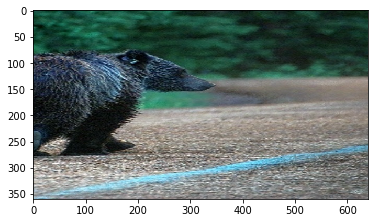

In [19]:
print(y_train[10])
plt.imshow(X_train[10])

# <a style="color:#920037"> 4. BASELINE MODEL  </a>

We encourage participants to develop a deep learning approach in order to solve this problem. Due to the low amount of images, we highly recommend to use **transfer learning** in order to produce efficient results. We will show you how easily it can be done with the `keras` deep learning library.

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import  Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import optimizers

## <a style="color:#920037"> 4.1 Introduction to keras </a>

First, let us build a very simple Convolutional Neural Network in order to get started with the `keras` package.

Building a `Sequential` model means that we will add layers on top of each other as we go. This type of model can be created with the `Sequential()` constructor.

In [ ]:
model = Sequential()

To create a convolution layer, we use the `Conv2D` constructor. Many layer types are available and all are created using the same style of api.

In [ ]:
conv_layer1 = Conv2D(filters = 8, kernel_size = 5, activation='relu', input_shape=(360,640,3))
conv_layer2 = Conv2D(filters = 16, kernel_size = 3, activation='relu')

maxpool_layer = MaxPooling2D(pool_size=2)
flatten_layer = Flatten()

dense_layer1 = Dense(10,activation = 'relu')
dense_layer2 = Dense(1,activation = 'sigmoid')

Now, we can add these layers to this model. 

In [ ]:
model.add(conv_layer1)
model.add(conv_layer2)

model.add(maxpool_layer)
model.add(flatten_layer)

model.add(dense_layer1)
model.add(dense_layer2)

To start training, we need to compile this model with an optimizer and a loss function to minimize. Here, we use the `'binary_crossentropy'` loss with the `Adam` optimizer.

In [ ]:
learning_rate = 0.01

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

And now fitting the model to the data is done with the `fit` method of the model.

In [ ]:
model.summary()

In [ ]:
n_epochs = 1
batch_size = 2

model.fit(X_train[:10], y_train[:10],
          batch_size=int(batch_size), 
          epochs=n_epochs)

## <a style="color:#920037"> 4.1 Transfer learning with keras </a>

Transfer learning is the technique of using a pretrained deep learning model as a feature extractor and then build a new model on top of it to perform a certain task. The incentive to do this is that features extracted by pretrained models often give a good representation of our images and fitting a deep learning model from this features is considerably easier and requires less data.

In this example, we will create a model on top of the VGG16 model trained on the Imagenet dataset.

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(128,128,3)),classes=1)

Now, we need to freeze the layers of VGG16 so that we don't alter them while training.

In [ ]:
for layer in base_model.layers:  
    layer.trainable = False

And now we use `keras`'s functional API to apply a series of layer operations to an input `x`.

In [ ]:
x = base_model.output  
x = Flatten()(x)  
x = Dense(10, activation='elu')(x)
x = Dropout(0.4)(x)  
x = Dense(10, activation='elu')(x)
x = Dropout(0.1)(x)
predictions = Dense(1, activation='sigmoid', name='predictions')(x)

Now, the model is just the list of operations that took place between the input of VGG16 and the output of the `predicitons`layer.

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

learning_rate = 0.01

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

This model is now ready to be compiled and fitted like the previous one.

# <a style="color:#920037"> 5. SUBMISSION ON RAMP </a>

## <a style="color:#920037"> 5.1 Submission files  </a>

Once you have developed a good solution, you need to implement an `ImageClassifier` class in order to submit it to RAMP.

Here, we give an example of an `ImageClassifier` class that implements transfer learning with VGG16.
This class has the following methods:

* `__init__()`: Constructs the `ImageClassifier` object.
* `_transform()`: Transforms an input array to have the right dimensions in order to be passed to the model. Very important when performing transfer learning as the transfered model has a specific input size requirement. 
* `_build_model()`: Builds the model like we did above.
* `fit()` : Fits the model to the data.
* `predict_proba()`: Makes a prediction on unseen data.

In [ ]:
import numpy as np
import cv2
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import applications

class ImageClassifier(object):

    def __init__(self, batch_size=64, epochs=2):
        """The constructor. Defines some training hyperparameters."""
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = self._build_model()

    def _transform(self, x):   
        """Transforms the image so it has a shape of (128, 128, 3) and values between 0 and 1"""
        """Any other kind of transformation should be put here."""
        x = x / 255.
        x_resize = cv2.resize(x, (128,128))
        return x_resize

    def fit(self, X_train, y_train):
        """Fits the model"""
        n = len(X_train)
        X = np.zeros((n, 128, 128, 3))
        Y = y_train.copy()
        for i in range(n):
            X[i] = self._transform(X_train[i])
            
        self.model.fit(x=X, y=Y, batch_size=self.batch_size, epochs=self.epochs, verbose=1)

        
    def predict_proba(self, X_test):
        """Performs the prediction."""
        n = len(X_test)
        X = np.zeros((nb, 128, 128, 3))
        for i in range(nb):
            X[i] = self._transform(X_test[i])
        return self.model.predict(X)
    
    def _build_model(self):
        base_model = applications.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(128,128,3)),classes=2)

        for layer in base_model.layers:  
            layer.trainable = False
        
        x = base_model.output  
        x = Flatten()(x)  
        x = Dense(10, activation='elu')(x)
        x = Dropout(0.4)(x)  
        x = Dense(10, activation='elu')(x)
        x = Dropout(0.1)(x)
        predictions = Dense(1, activation='sigmoid', name='predictions')(x)

        model = Model(inputs=base_model.input, outputs=predictions)

        model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-3), metrics=['accuracy'])
        
        return model


## <a style="color:#920037"> 5.2 Local testing before submitted to RAMP  </a>

Once you have defined your `ImageClassifier`class, you should write it in a python script called `image_classifer.py` and then save this script in a new folder inside the `submissions` folder. For this example, we have named our folder `transfer_learning`.

You should test your submission before submitting it to the RAMP website. For this, the `ramp_test_submission.py` is available to you. To use it, make sure that you have installed the `ramp-workflow` package.

In order to test your submission, you should run the script like shown below. Once the test has been successfully ran, it should output the cross validation scores of your model.

In [ ]:
!ramp_test_submission --submission transfer_learning --quick-test

If the test worked, you should be ready to submit on the RAMP website. Good luck!